# Read Clade Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clade_df = pd.read_csv("../June_mutation_freq.csv")
clade_df.head()

,month,mutation,count,frequency
0,2020-04,M:A2V,8,0.015066
1,2020-04,N:D377G,15,0.028249
2,2020-04,N:E367K,1,0.001883
3,2020-04,N:G204R,57,0.107345
4,2020-04,N:M210I,2,0.003766


In [3]:
clade_df.shape

(2903, 4)

In [4]:
mutation_arr = set(list(clade_df['mutation']))
len(mutation_arr)

1711

In [5]:
clade_6month = pd.read_csv("../June_mutation_freq_6months.csv")
clade_6month.head()

,mutation,number_month
0,N:G204R,14
1,N:R203K,14
2,ORF1b:P314L,14
3,S:D614G,14
4,ORF3a:Q57H,13


In [6]:
clade_6month_list = list(clade_6month['mutation'])
len(clade_6month_list)

53

In [7]:
clade_info = {}

for index, row in clade_df.iterrows():
#     mutation_name = row['mutation'].split(":")[0]
    mutation_name = row['mutation']
    if(mutation_name not in clade_6month_list):    # filter out all the short lived mutations
        continue     
    
    month = row['month']
    if(mutation_name not in clade_info):
        clade_info[mutation_name] = {}
    if(month not in clade_info[mutation_name]):
        clade_info[mutation_name][month] = 0
    clade_info[mutation_name][month] += row["frequency"]

In [8]:
clade_info

{'N:G204R': {'2020-04': 0.107344632768362,
  '2020-05': 0.117117117117117,
  '2020-06': 0.126688102893891,
  '2020-07': 0.121761658031088,
  '2020-08': 0.120689655172414,
  '2020-09': 0.139130434782609,
  '2020-10': 0.0878186968838527,
  '2020-11': 0.0895196506550218,
  '2020-12': 0.0809090909090909,
  '2021-01': 0.0716332378223496,
  '2021-02': 0.0396158463385354,
  '2021-03': 0.0129950495049505,
  '2021-04': 0.0056689342403628,
  '2021-05': 0.0053763440860215},
 'N:R203K': {'2020-04': 0.107344632768362,
  '2020-05': 0.117117117117117,
  '2020-06': 0.126688102893891,
  '2020-07': 0.121761658031088,
  '2020-08': 0.120689655172414,
  '2020-09': 0.139130434782609,
  '2020-10': 0.0878186968838527,
  '2020-11': 0.0895196506550218,
  '2020-12': 0.0809090909090909,
  '2021-01': 0.0716332378223496,
  '2021-02': 0.0396158463385354,
  '2021-03': 0.0133044554455446,
  '2021-04': 0.0056689342403628,
  '2021-05': 0.0053763440860215},
 'ORF1a:I300F': {'2020-04': 0.0828625235404896,
  '2020-05': 0.1

In [9]:
month_arr = list(set(list(clade_df['month'])))
month_arr = sorted(month_arr)

In [10]:
mutation_freq_arr = {}

for mutation in clade_info:
    mutation_freq_arr[mutation] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in clade_info[mutation]):
            mutation_freq_arr[mutation][i] = clade_info[mutation][month]

In [11]:
print(month_arr)
mutation_freq_arr

['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05']


{'N:G204R': array([0.10734463, 0.11711712, 0.1266881 , 0.12176166, 0.12068966,
        0.13913043, 0.0878187 , 0.08951965, 0.08090909, 0.07163324,
        0.03961585, 0.01299505, 0.00566893, 0.00537634]),
 'N:R203K': array([0.10734463, 0.11711712, 0.1266881 , 0.12176166, 0.12068966,
        0.13913043, 0.0878187 , 0.08951965, 0.08090909, 0.07163324,
        0.03961585, 0.01330446, 0.00566893, 0.00537634]),
 'ORF1a:I300F': array([0.08286252, 0.11454311, 0.11382637, 0.11010363, 0.08275862,
        0.07391304, 0.08498584, 0.09388646, 0.07818182, 0.05921681,
        0.01440576, 0.00402228, 0.        , 0.        ]),
 'ORF1b:P314L': array([0.13559322, 0.14414414, 0.13954984, 0.13406736, 0.1       ,
        0.09130435, 0.11048159, 0.10043668, 0.08454545, 0.07449857,
        0.05162065, 0.04486386, 0.04450113, 0.03978495]),
 'ORF3a:K75N': array([0.00188324, 0.001287  , 0.00064309, 0.00064767, 0.        ,
        0.00434783, 0.        , 0.        , 0.00090909, 0.        ,
        0.        , 0.

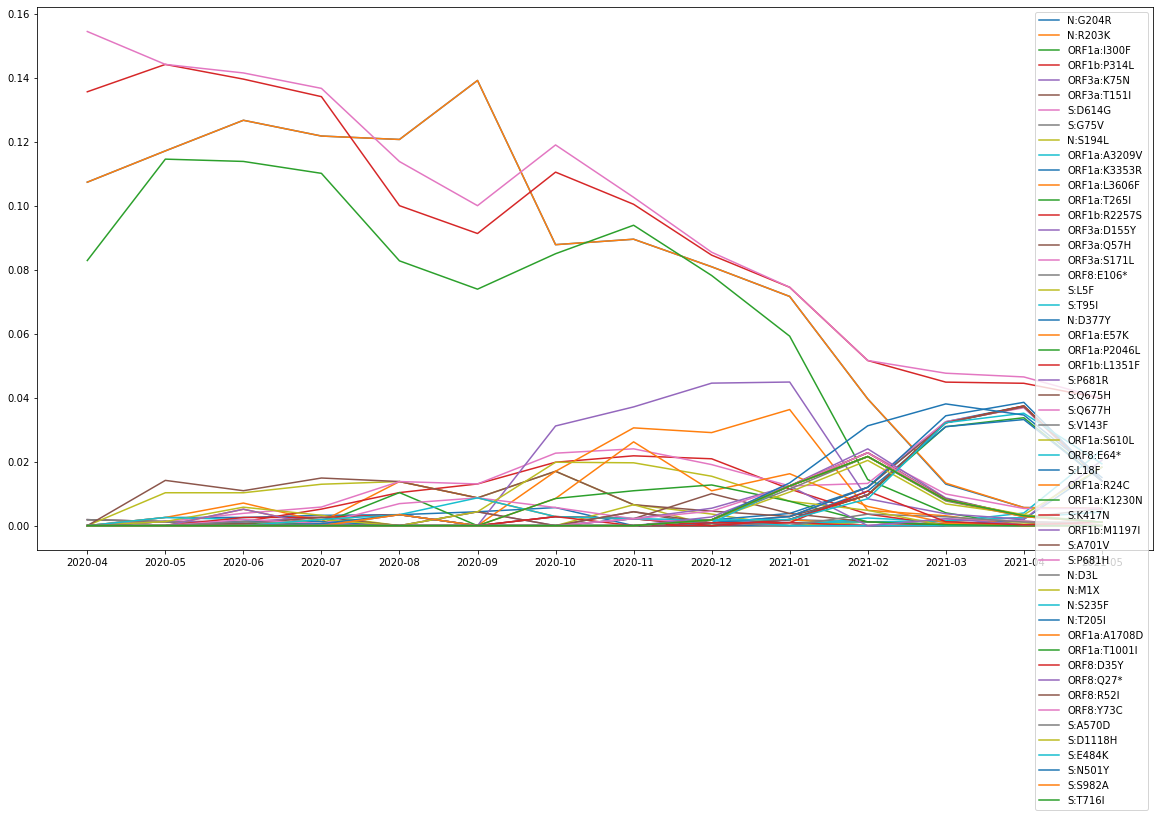

In [12]:
plt.rcParams["figure.figsize"] = (20,10)

# limit = 14
# plt.plot(month_arr[:limit], x, label="X")
# plt.plot(month_arr[:limit], y, label="Y")
# plt.legend(loc="upper right")

for mutation in mutation_freq_arr:
    plt.plot(month_arr, mutation_freq_arr[mutation], label=mutation)

plt.legend(loc="upper right")
plt.show()

# Read  Old Data

In [13]:
symptom_df = pd.read_csv("../symptom_frequency_monthWise - symptom_frequency_monthWise.csv")
symptom_df

,Symptom Name,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,High fever,646,440,976,257,165,177,55,61,33,18,5
1,Difficulty in breathing,4412,1745,5317,1055,490,405,195,234,175,103,14
2,Muscle pain,6139,3884,11889,2370,1292,1031,435,505,264,165,19
3,Dry cough,11219,5131,16114,3066,1807,1699,678,836,498,277,47
4,Not getting smell,1880,1943,7771,1763,1031,688,402,455,301,139,22
5,Feeling testless,3126,2829,8891,2029,1115,860,400,439,287,141,21
6,Fever,3563,3684,8302,2154,1260,1146,413,522,264,139,23
7,Sore throat,7051,3488,11351,2215,1058,889,412,427,273,148,19
8,Weakness,7950,910,2363,683,374,307,154,117,93,38,8
9,Itching eyes or turning red,5709,2295,9253,1372,632,433,225,272,155,89,18


In [14]:
symptom_freq_arr = {}

for index, row in symptom_df.iterrows():
    symptom_name = row['Symptom Name']
    symptom_freq_arr[symptom_name] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in row):
            symptom_freq_arr[symptom_name][i] = row[month]

In [15]:
symptom_freq_arr

{'High fever': array([646., 440., 976., 257., 165., 177.,  55.,  61.,  33.,  18.,   5.,
          0.,   0.,   0.]),
 'Difficulty in breathing': array([4412., 1745., 5317., 1055.,  490.,  405.,  195.,  234.,  175.,
         103.,   14.,    0.,    0.,    0.]),
 'Muscle pain': array([ 6139.,  3884., 11889.,  2370.,  1292.,  1031.,   435.,   505.,
          264.,   165.,    19.,     0.,     0.,     0.]),
 'Dry cough': array([11219.,  5131., 16114.,  3066.,  1807.,  1699.,   678.,   836.,
          498.,   277.,    47.,     0.,     0.,     0.]),
 'Not getting smell': array([1880., 1943., 7771., 1763., 1031.,  688.,  402.,  455.,  301.,
         139.,   22.,    0.,    0.,    0.]),
 'Feeling testless': array([3126., 2829., 8891., 2029., 1115.,  860.,  400.,  439.,  287.,
         141.,   21.,    0.,    0.,    0.]),
 'Fever': array([3563., 3684., 8302., 2154., 1260., 1146.,  413.,  522.,  264.,
         139.,   23.,    0.,    0.,    0.]),
 'Sore throat': array([ 7051.,  3488., 11351.,  2215., 

# Read new data (No data for march)

In [49]:
import json

with open("new_data.json", "r") as f:
    data = json.load(f)

In [50]:
data

{'Feeling pain and pressure in chest': {'2020-04': {'BD': 14533,
   'Dhaka': 3014},
  '2020-05': {'BD': 8918, 'Dhaka': 1534},
  '2020-06': {'BD': 26882, 'Dhaka': 3613},
  '2020-07': {'BD': 6692, 'Dhaka': 651},
  '2020-08': {'BD': 4468, 'Dhaka': 424},
  '2020-09': {'BD': 3280, 'Dhaka': 337},
  '2020-10': {'BD': 1481, 'Dhaka': 169},
  '2020-11': {'BD': 1575, 'Dhaka': 198},
  '2020-12': {'BD': 1117, 'Dhaka': 105},
  '2021-01': {'BD': 680, 'Dhaka': 63},
  '2021-02': {'BD': 129, 'Dhaka': 8},
  '2021-04': {'BD': 3494, 'Dhaka': 373},
  '2021-05': {'BD': 1186, 'Dhaka': 87},
  '2021-06': {'BD': 59, 'Dhaka': 8}},
 'Not getting smell': {'2020-04': {'BD': 4502, 'Dhaka': 873},
  '2020-05': {'BD': 5954, 'Dhaka': 1157},
  '2020-06': {'BD': 21205, 'Dhaka': 2768},
  '2020-07': {'BD': 6498, 'Dhaka': 641},
  '2020-08': {'BD': 5441, 'Dhaka': 458},
  '2020-09': {'BD': 3541, 'Dhaka': 333},
  '2020-10': {'BD': 1815, 'Dhaka': 245},
  '2020-11': {'BD': 2299, 'Dhaka': 273},
  '2020-12': {'BD': 1390, 'Dhaka': 16

In [51]:
month_total_cases = {}
for symptom in data:
    for month in data[symptom]:
        if(month not in month_total_cases):
            month_total_cases[month] = 0
        month_total_cases[month] += data[symptom][month]['BD']
month_total_cases

{'2020-04': 173192,
 '2020-05': 122939,
 '2020-06': 347253,
 '2020-07': 97420,
 '2020-08': 72723,
 '2020-09': 55117,
 '2020-10': 23902,
 '2020-11': 26890,
 '2020-12': 17340,
 '2021-01': 10785,
 '2021-02': 1892,
 '2021-04': 44212,
 '2021-05': 15971,
 '2021-06': 1086}

In [97]:
symptom_freq_arr = {}

for symptom in data:
    arr = []
    for month in data[symptom]:
#         arr.append(data[symptom][month]['BD'])            # consider total counts
        arr.append(data[symptom][month]['BD']/month_total_cases[month]) # consider percentage
    
    symptom_freq_arr[symptom] = np.array(arr)
    
symptom_freq_arr

{'Feeling pain and pressure in chest': array([0.08391265, 0.07254004, 0.0774133 , 0.06869226, 0.06143861,
        0.05950977, 0.06196134, 0.05857196, 0.06441753, 0.06305053,
        0.06818182, 0.07902832, 0.0742596 , 0.05432781]),
 'Not getting smell': array([0.02599427, 0.04843052, 0.06106499, 0.06670088, 0.07481815,
        0.06424515, 0.07593507, 0.08549647, 0.08016148, 0.06703755,
        0.07293869, 0.05184113, 0.05810532, 0.05893186]),
 'Dry cough': array([0.14035868, 0.12642042, 0.1254532 , 0.12214124, 0.13253029,
        0.15579585, 0.13471676, 0.14994422, 0.14700115, 0.14594344,
        0.13266385, 0.12659459, 0.12428777, 0.13075506]),
 'Diabetes': array([0.03958035, 0.04198017, 0.04661731, 0.04105933, 0.03521582,
        0.02832157, 0.03267509, 0.03175902, 0.03961938, 0.0407974 ,
        0.05285412, 0.03881299, 0.03863252, 0.0441989 ]),
 'Kidney problem': array([0.01214259, 0.00988295, 0.01097183, 0.00949497, 0.00831924,
        0.00756572, 0.0090369 , 0.00818148, 0.01032295

# Misc

In [55]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [56]:
def applyMinMaxNorm(arr):
    arr = np.array(arr)
    ret = np.zeros(len(arr))
    
    mx = arr.max()
    mn = arr.min()

    for i in range(len(arr)):
        ret[i] = (arr[i] - mn)/(mx - mn)
    
    return ret

In [57]:
# symptom = 'High fever'
# mutation1 = 'ORF1b'
# mutation2 = 'ORF3a'

# limit = 14

# x1 = applyMinMaxNorm(mutation_freq_arr[mutation1][:limit])
# x2 = applyMinMaxNorm(mutation_freq_arr[mutation2][:limit])
# y = applyMinMaxNorm(symptom_freq_arr[symptom][:limit])

In [58]:
# y

In [59]:
# plt.rcParams["figure.figsize"] = (20,10)
# plt.plot(month_arr[:limit], x1, label="X1", color="blue")
# plt.plot(month_arr[:limit], x2, label="X2", color="blue")
# plt.plot(month_arr[:limit], y, label="Y", color="red")
# plt.legend(loc="upper right")

# Multiple Regression

In [60]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [61]:
def getFeatureVector(feature_arr):
    ln = len(feature_arr[0])
    ret = []
    for i in range(ln):
        ret.append([])
        
    for arr in feature_arr:
        for i in range(len(arr)):
            ret[i].append(arr[i])
    return np.array(ret)

In [62]:
# print(getFeatureVector([x1,x2]).shape)
# getFeatureVector([x1,x2])

In [63]:
# regr = linear_model.LinearRegression()
# X = getFeatureVector([x1,x2])
# print(X.shape)
# regr.fit(X, y)

In [64]:
# print(regr.coef_)
# print(regr.intercept_)
# print(regr.score(X,y))

In [65]:
# print(regr.coef_[0])

In [66]:
# y_pred = regr.predict(X)
# mean_squared_error(y_pred, y)

In [67]:
def getXY(mutation_arr, symptom, limit = -1):
    y = applyMinMaxNorm(symptom_freq_arr[symptom])
    xrr = []
    for mutation in mutation_arr:
        x = applyMinMaxNorm(mutation_freq_arr[mutation])
        xrr.append(x)
        
    if(limit != -1):
        y = y[:limit]
        for i in range(len(xrr)):
            xrr[i] = xrr[i][:limit]
    return xrr, y

In [68]:
def plotFormattedData(mutation_arr, symptom, limit = -1):
    xrr, y = getXY(mutation_arr, symptom, limit)
    month_arr = list(set(list(clade_df['month'])))
    month_arr = sorted(month_arr)
    if(limit!=-1):
        month_arr = month_arr[:limit]
    
    for i in range(len(mutation_arr)):
        mutation = mutation_arr[i]
        x = xrr[i]
        plt.plot(month_arr, x, label=mutation)
    
    plt.plot(month_arr, y, label=symptom, linewidth=5)
    plt.legend(loc="upper right")
    plt.show()

In [69]:
def performMultipleRegression(mutation_arr, symptom, limit = -1):
    
    xrr, y = getXY(mutation_arr, symptom, limit)
            
    X = getFeatureVector(xrr)
#     print(X.shape, y.shape)
    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    
    coef = regr.coef_
    r_squared = regr.score(X, y)
    y_pred = regr.predict(X)
    mse = mean_squared_error(y_pred, y)
    
    weights = {}
    for i in range(len(mutation_arr)):
        weights[mutation_arr[i]] = coef[i]
        
    return {
        "weights"  : weights,
        "r_squared": r_squared,
        "mse"      : mse,
        "mutations": mutation_arr
    }

In [70]:
# plotFormattedData(['ORF1b', 'ORF3a'], 'High fever', limit=-1)

In [71]:
# performMultipleRegression(['ORF1b'], 'High fever', limit=11)

In [72]:
##########################################################################################

In [73]:
for symp in symptom_freq_arr:
    print(symp)

Feeling pain and pressure in chest
Not getting smell
Dry cough
Diabetes
Kidney problem
Fever
Sore throat
Difficulty in breathing
High blood pressure
High fever
Weakness
Itching eyes or turning red
Sleepiness
Respiratory illness
Feeling testless
Muscle pain
Abdominal pain, nausea or thin closet
Cancer
Heart diseases


In [80]:
symptom = "High fever"
limit = -1

In [81]:
##########################################################################################

# Filter Positive Slopes

In [82]:
mutation_arr = []
has_positive_slopes = []
for mutation in mutation_freq_arr:
    mutation_arr.append(mutation)
    reg_vals = performMultipleRegression([mutation], symptom, limit)
    weight = -1
    for key in reg_vals['weights']:
        weight = reg_vals['weights'][key]
    if(weight > 0):
        has_positive_slopes.append(mutation)
    print(mutation, weight)

N:G204R -0.23982931425817094
N:R203K -0.24057309247930528
ORF1a:I300F -0.40471966458414166
ORF1b:P314L -0.4589041275410545
ORF3a:K75N 0.30006893924389094
ORF3a:T151I -0.24564698727304382
S:D614G -0.4512765909403252
S:G75V -0.2541084563412407
N:S194L -0.14270084127416663
ORF1a:A3209V 0.6962587511971597
ORF1a:K3353R 0.20302017348832213
ORF1a:L3606F 0.14012014793007416
ORF1a:T265I 0.16701682431566733
ORF1b:R2257S -0.020620629640165648
ORF3a:D155Y -0.43043273560190076
ORF3a:Q57H 0.11278954689808537
ORF3a:S171L 0.17479237106092232
ORF8:E106* 0.5961063364878344
S:L5F -0.3591615682620093
S:T95I 0.26138225108718544
N:D377Y 0.6360521660116969
ORF1a:E57K -0.198289713221889
ORF1a:P2046L 0.1787728057997211
ORF1b:L1351F -0.23472345350311635
S:P681R -0.044524212827274326
S:Q675H -0.021983035300120808
S:Q677H 0.30376681205707373
S:V143F -0.01406487828009919
ORF1a:S610L -0.1047783714656776
ORF8:E64* 0.48245283774568054
S:L18F 0.17304851374871583
ORF1a:R24C -0.16009243965028316
ORF1a:K1230N -0.19013197

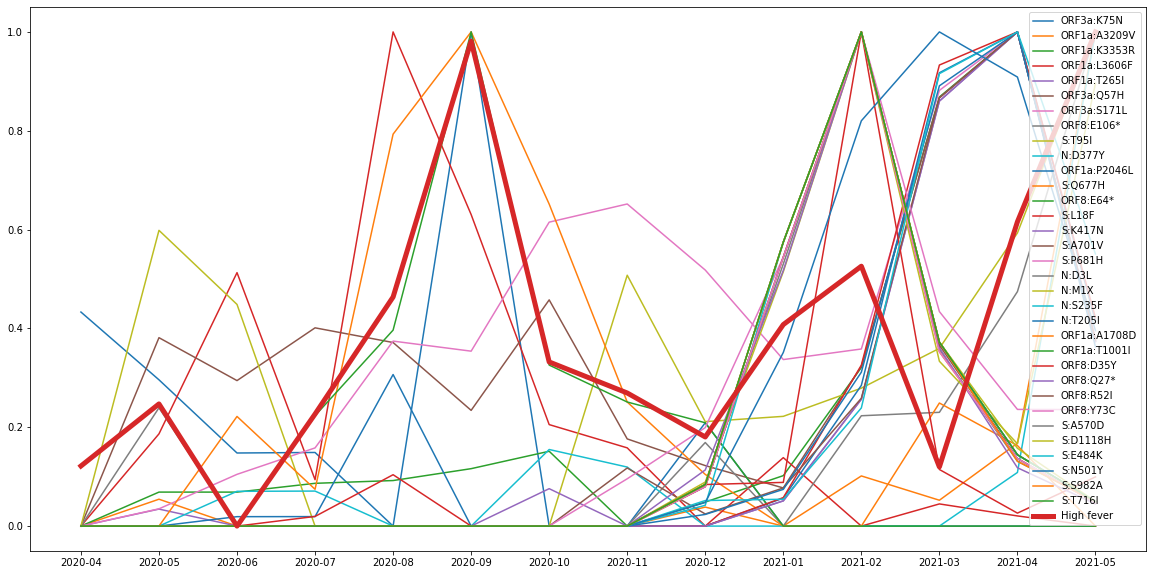

In [83]:
plotFormattedData(has_positive_slopes, symptom, limit)

# Check all combinations

In [84]:
import itertools
from operator import itemgetter

In [92]:
all_combinations = []
combination_limit = 3
for i in range(1, min(combination_limit, len(has_positive_slopes))+1):
    current_combinations = itertools.combinations(has_positive_slopes, i)
    for comb in current_combinations:
        print(list(comb))
        all_combinations.append(list(comb))
all_combinations

['ORF3a:K75N']
['ORF1a:A3209V']
['ORF1a:K3353R']
['ORF1a:L3606F']
['ORF1a:T265I']
['ORF3a:Q57H']
['ORF3a:S171L']
['ORF8:E106*']
['S:T95I']
['N:D377Y']
['ORF1a:P2046L']
['S:Q677H']
['ORF8:E64*']
['S:L18F']
['S:K417N']
['S:A701V']
['S:P681H']
['N:D3L']
['N:M1X']
['N:S235F']
['N:T205I']
['ORF1a:A1708D']
['ORF1a:T1001I']
['ORF8:D35Y']
['ORF8:Q27*']
['ORF8:R52I']
['ORF8:Y73C']
['S:A570D']
['S:D1118H']
['S:E484K']
['S:N501Y']
['S:S982A']
['S:T716I']
['ORF3a:K75N', 'ORF1a:A3209V']
['ORF3a:K75N', 'ORF1a:K3353R']
['ORF3a:K75N', 'ORF1a:L3606F']
['ORF3a:K75N', 'ORF1a:T265I']
['ORF3a:K75N', 'ORF3a:Q57H']
['ORF3a:K75N', 'ORF3a:S171L']
['ORF3a:K75N', 'ORF8:E106*']
['ORF3a:K75N', 'S:T95I']
['ORF3a:K75N', 'N:D377Y']
['ORF3a:K75N', 'ORF1a:P2046L']
['ORF3a:K75N', 'S:Q677H']
['ORF3a:K75N', 'ORF8:E64*']
['ORF3a:K75N', 'S:L18F']
['ORF3a:K75N', 'S:K417N']
['ORF3a:K75N', 'S:A701V']
['ORF3a:K75N', 'S:P681H']
['ORF3a:K75N', 'N:D3L']
['ORF3a:K75N', 'N:M1X']
['ORF3a:K75N', 'N:S235F']
['ORF3a:K75N', 'N:T205I']
['

['ORF3a:Q57H', 'S:L18F', 'S:K417N']
['ORF3a:Q57H', 'S:L18F', 'S:A701V']
['ORF3a:Q57H', 'S:L18F', 'S:P681H']
['ORF3a:Q57H', 'S:L18F', 'N:D3L']
['ORF3a:Q57H', 'S:L18F', 'N:M1X']
['ORF3a:Q57H', 'S:L18F', 'N:S235F']
['ORF3a:Q57H', 'S:L18F', 'N:T205I']
['ORF3a:Q57H', 'S:L18F', 'ORF1a:A1708D']
['ORF3a:Q57H', 'S:L18F', 'ORF1a:T1001I']
['ORF3a:Q57H', 'S:L18F', 'ORF8:D35Y']
['ORF3a:Q57H', 'S:L18F', 'ORF8:Q27*']
['ORF3a:Q57H', 'S:L18F', 'ORF8:R52I']
['ORF3a:Q57H', 'S:L18F', 'ORF8:Y73C']
['ORF3a:Q57H', 'S:L18F', 'S:A570D']
['ORF3a:Q57H', 'S:L18F', 'S:D1118H']
['ORF3a:Q57H', 'S:L18F', 'S:E484K']
['ORF3a:Q57H', 'S:L18F', 'S:N501Y']
['ORF3a:Q57H', 'S:L18F', 'S:S982A']
['ORF3a:Q57H', 'S:L18F', 'S:T716I']
['ORF3a:Q57H', 'S:K417N', 'S:A701V']
['ORF3a:Q57H', 'S:K417N', 'S:P681H']
['ORF3a:Q57H', 'S:K417N', 'N:D3L']
['ORF3a:Q57H', 'S:K417N', 'N:M1X']
['ORF3a:Q57H', 'S:K417N', 'N:S235F']
['ORF3a:Q57H', 'S:K417N', 'N:T205I']
['ORF3a:Q57H', 'S:K417N', 'ORF1a:A1708D']
['ORF3a:Q57H', 'S:K417N', 'ORF1a:T1001I']

[['ORF3a:K75N'],
 ['ORF1a:A3209V'],
 ['ORF1a:K3353R'],
 ['ORF1a:L3606F'],
 ['ORF1a:T265I'],
 ['ORF3a:Q57H'],
 ['ORF3a:S171L'],
 ['ORF8:E106*'],
 ['S:T95I'],
 ['N:D377Y'],
 ['ORF1a:P2046L'],
 ['S:Q677H'],
 ['ORF8:E64*'],
 ['S:L18F'],
 ['S:K417N'],
 ['S:A701V'],
 ['S:P681H'],
 ['N:D3L'],
 ['N:M1X'],
 ['N:S235F'],
 ['N:T205I'],
 ['ORF1a:A1708D'],
 ['ORF1a:T1001I'],
 ['ORF8:D35Y'],
 ['ORF8:Q27*'],
 ['ORF8:R52I'],
 ['ORF8:Y73C'],
 ['S:A570D'],
 ['S:D1118H'],
 ['S:E484K'],
 ['S:N501Y'],
 ['S:S982A'],
 ['S:T716I'],
 ['ORF3a:K75N', 'ORF1a:A3209V'],
 ['ORF3a:K75N', 'ORF1a:K3353R'],
 ['ORF3a:K75N', 'ORF1a:L3606F'],
 ['ORF3a:K75N', 'ORF1a:T265I'],
 ['ORF3a:K75N', 'ORF3a:Q57H'],
 ['ORF3a:K75N', 'ORF3a:S171L'],
 ['ORF3a:K75N', 'ORF8:E106*'],
 ['ORF3a:K75N', 'S:T95I'],
 ['ORF3a:K75N', 'N:D377Y'],
 ['ORF3a:K75N', 'ORF1a:P2046L'],
 ['ORF3a:K75N', 'S:Q677H'],
 ['ORF3a:K75N', 'ORF8:E64*'],
 ['ORF3a:K75N', 'S:L18F'],
 ['ORF3a:K75N', 'S:K417N'],
 ['ORF3a:K75N', 'S:A701V'],
 ['ORF3a:K75N', 'S:P681H'],
 ['O

In [93]:
from tqdm import tqdm
track = []

for i in tqdm(range(len(all_combinations))):
    comb = all_combinations[i]
    reg_val = performMultipleRegression(comb, symptom, limit)
#     print(reg_val)
    track.append(reg_val)

100%|██████████| 6017/6017 [00:05<00:00, 1128.61it/s]


In [94]:
sorted(track, key=itemgetter('r_squared'), reverse=True)

[{'weights': {'ORF8:E106*': 0.6468077774311883,
   'ORF8:E64*': 0.8888286902461038,
   'N:M1X': 0.3465809531871154},
  'r_squared': 0.8637345524390375,
  'mse': 0.011709197043481603,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'N:M1X']},
 {'weights': {'ORF8:E106*': 0.9064701139127097,
   'ORF8:E64*': 0.9295179306995178,
   'N:S235F': 0.32233795535660376},
  'r_squared': 0.8605396566915342,
  'mse': 0.011983732257730698,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'N:S235F']},
 {'weights': {'ORF8:E106*': 0.9046396908966657,
   'ORF8:E64*': 0.9267351793635408,
   'S:D1118H': 0.31592863129101273},
  'r_squared': 0.856411702726213,
  'mse': 0.012338444528754083,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'S:D1118H']},
 {'weights': {'ORF8:E106*': 0.9056664360373782,
   'ORF8:E64*': 0.925815994133279,
   'ORF1a:T1001I': 0.3143139282129754},
  'r_squared': 0.8556763228289949,
  'mse': 0.01240163522215779,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'ORF1a:T1001I']},
 {'weights': {'ORF8:E106*': 0

In [95]:
sorted(track, key=itemgetter('mse'), reverse=False)

[{'weights': {'ORF8:E106*': 0.6468077774311883,
   'ORF8:E64*': 0.8888286902461038,
   'N:M1X': 0.3465809531871154},
  'r_squared': 0.8637345524390375,
  'mse': 0.011709197043481603,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'N:M1X']},
 {'weights': {'ORF8:E106*': 0.9064701139127097,
   'ORF8:E64*': 0.9295179306995178,
   'N:S235F': 0.32233795535660376},
  'r_squared': 0.8605396566915342,
  'mse': 0.011983732257730698,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'N:S235F']},
 {'weights': {'ORF8:E106*': 0.9046396908966657,
   'ORF8:E64*': 0.9267351793635408,
   'S:D1118H': 0.31592863129101273},
  'r_squared': 0.856411702726213,
  'mse': 0.012338444528754083,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'S:D1118H']},
 {'weights': {'ORF8:E106*': 0.9056664360373782,
   'ORF8:E64*': 0.925815994133279,
   'ORF1a:T1001I': 0.3143139282129754},
  'r_squared': 0.8556763228289949,
  'mse': 0.01240163522215779,
  'mutations': ['ORF8:E106*', 'ORF8:E64*', 'ORF1a:T1001I']},
 {'weights': {'ORF8:E106*': 0

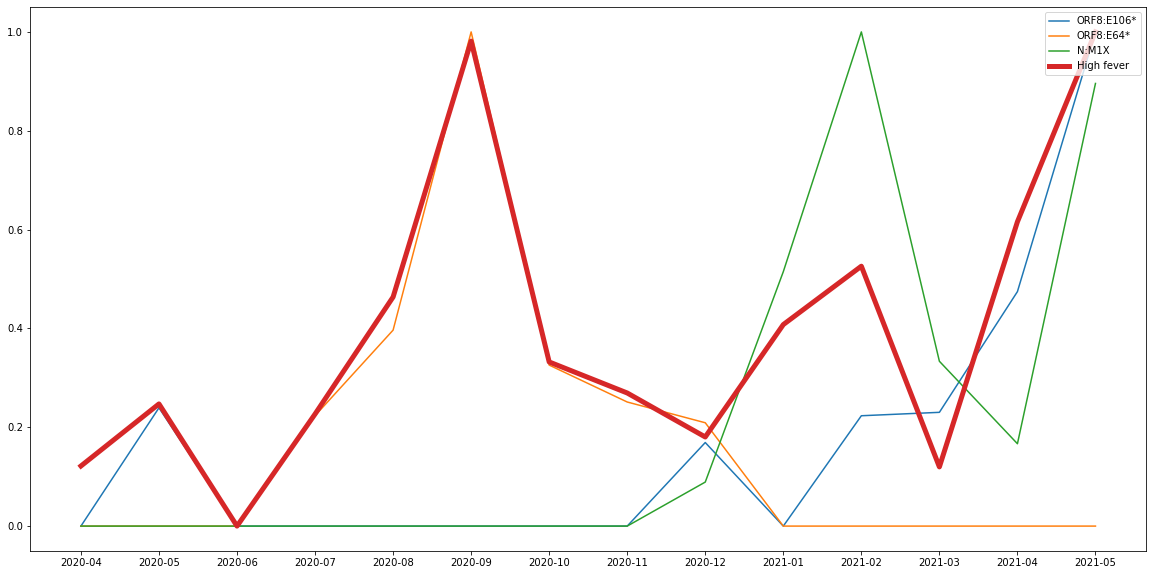

In [96]:
plotFormattedData(['ORF8:E106*', 'ORF8:E64*', 'N:M1X'], symptom, limit)